#### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
CleanedWeapon = pd.read_csv("CleanedWeapon.csv")

#### Task 3 Crit Damage Viable Weapons

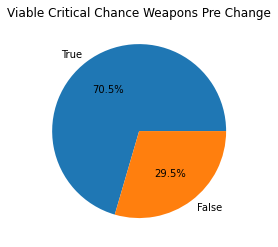

In [3]:
CleanedWeapon['CritPreNerf'] = CleanedWeapon['Critical_Chance']*7.6
CleanedWeapon['CritPostNerf'] = CleanedWeapon['Critical_Chance']*5.4
CleanedWeapon.to_csv("CleanedWeapon.csv", index=False)

def ViableCritWeapon(crit):
    if(crit >= 1):
        return True
    else:
        return False

CleanedWeapon['ViableCritPreNerf'] = CleanedWeapon['CritPreNerf'].apply(lambda x:ViableCritWeapon(x))
CleanedWeapon['ViableCritPostNerf'] = CleanedWeapon['CritPostNerf'].apply(lambda x:ViableCritWeapon(x))

CleanedWeapon['ViableCritPreNerf'].value_counts().plot(kind='pie',autopct='%1.1f%%',title="Viable Critical Chance Weapons Pre Change")
plt.ylabel("")
plt.show()

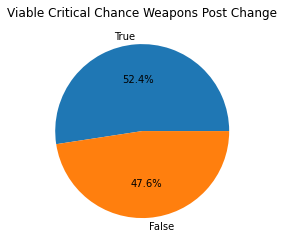

In [4]:
CleanedWeapon['ViableCritPostNerf'].value_counts().plot(kind='pie',autopct='%1.1f%%',title="Viable Critical Chance Weapons Post Change")
plt.ylabel("")
plt.show()

In [5]:
def BeforeCritDamage(df):
    critMultMax = 1 + ((int(df.CritPreNerf)+1) * (df.Critical_Damage - 1))
    critMultMin = 1 + ((int(df.CritPreNerf)) * (df.Critical_Damage - 1))
    critaverage = (df.CritPreNerf - int(df.CritPreNerf))*10
    tempdam = 0
    for i in range(0,10):
        if(i < int(critaverage)):
            tempdam += (df.Total_Damage * critMultMax)
        else:
            tempdam += (df.Total_Damage * critMultMin)
    return tempdam/10

def PostCritDamage(df):
    critMultMax = 1 + ((int(df.CritPostNerf)+1) * (df.Critical_Damage - 1))
    critMultMin = 1 + ((int(df.CritPostNerf)) * (df.Critical_Damage - 1))
    critaverage = (df.CritPostNerf - int(df.CritPostNerf))*10
    tempdam = 0
    for i in range(0,10):
        if(i < int(critaverage)):
            tempdam += (df.Total_Damage * critMultMax)
        else:
            tempdam += (df.Total_Damage * critMultMin)
    return tempdam/10

CleanedWeapon['PreNerfDamage'] = CleanedWeapon.apply(BeforeCritDamage, axis=1)
CleanedWeapon['PostNerfDamage'] = CleanedWeapon.apply(PostCritDamage, axis=1)
CleanedWeapon.head(20)

,Name,Type,Total_Damage,Heavy_Attack,Slam_Attack,Slide_Attack,Range,Slam_Radius,Attack_Speed,Critical_Chance,...,Riven_Disposition,Released_Update,RawDPS,CritPreNerf,CritPostNerf,PreNerfDamage,PostNerfDamage,AverageCritDamage,ViableCritPreNerf,ViableCritPostNerf
0,Ack & Brunt,Sword and Shield,149.0,745.0,447.0,149.0,2.50,7,0.833,0.200,...,1.35,17.0,124.117,1.520,1.080,372.50,298.00,178.80,True,True
1,Amphis,Staff,130.0,650.0,390.0,130.0,3.00,6,1.250,0.130,...,1.50,6.5,162.500,0.988,0.702,211.90,193.70,139.10,False,False
2,Anku,Scythe,170.0,1020.0,510.0,340.0,2.80,8,1.080,0.200,...,1.46,16.7,183.600,1.520,1.080,425.00,340.00,204.00,True,True
3,Ankyros,Fist,90.0,450.0,270.0,270.0,1.25,8,1.170,0.200,...,1.45,7.8,105.300,1.520,1.080,225.00,180.00,108.00,True,True
4,Ankyros Prime,Fist,128.0,640.0,384.0,384.0,1.25,8,1.250,0.280,...,1.45,12.4,160.000,2.128,1.512,504.32,396.80,163.84,True,True
5,Arca Titron,Hammer,360.0,2160.0,1080.0,720.0,2.60,9,0.733,0.240,...,1.30,21.7,263.880,1.824,1.296,1008.00,792.00,432.00,True,True
6,Arum Spinosa,Warfan,297.0,1188.0,594.0,297.0,1.70,5,1.080,0.090,...,1.05,29.5,320.760,0.684,0.486,457.38,403.92,297.00,False,False
7,Atterax,Whip,129.0,581.0,387.0,258.0,2.50,5,0.917,0.250,...,1.05,14.7,118.293,1.900,1.350,619.20,464.40,180.60,True,True
8,Bo,Staff,140.0,700.0,420.0,140.0,3.00,6,1.000,0.125,...,1.35,0,140.000,0.950,0.675,266.00,224.00,154.00,False,False
9,Bo Prime,Staff,176.0,880.0,528.0,176.0,3.00,6,1.080,0.240,...,1.35,13.7,190.080,1.824,1.296,682.88,513.92,232.32,True,True


#### Task 5 Condition Overload

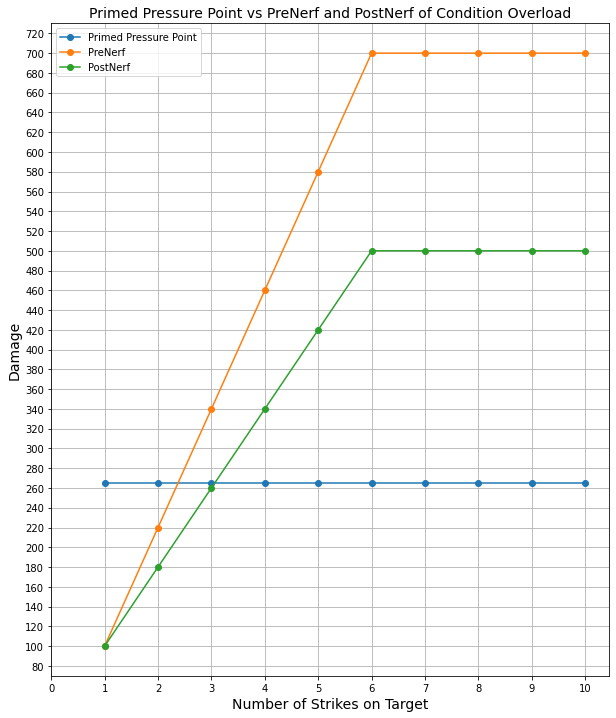

In [11]:
# How bad is the change for Condition Overload 120% to 80%
ConOver = pd.read_csv('conditionoverload.csv')

plt.figure(figsize=(10, 12))
plt.plot(ConOver.index+1, ConOver['Base'], label="Primed Pressure Point", marker='o')
plt.plot(ConOver.index+1, ConOver['PreNerf'], label="PreNerf", marker='o')
plt.plot(ConOver.index+1, ConOver['PostNerf'], label="PostNerf", marker='o')
plt.xticks(np.arange(0, 11, 1))
plt.yticks(np.arange(80, 740, 20.0))
plt.title("Primed Pressure Point vs PreNerf and PostNerf of Condition Overload", fontsize = 14)
plt.xlabel("Number of Strikes on Target", fontsize = 14)
plt.ylabel("Damage", fontsize = 14)
plt.legend()
plt.grid()
plt.show()